In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# Caminho do arquivo (ajuste conforme a localização do seu arquivo)
file_path = '/home/laramva/projetos/ecommerce-estatistica/ecommerce_estatistica.csv'


In [9]:
df = pd.read_csv('/home/laramva/projetos/ecommerce-estatistica/ecommerce_estatistica.csv')

In [10]:
print("DataFrame carregado com sucesso. Primeiras 5 linhas:")
print(df.head())

DataFrame carregado com sucesso. Primeiras 5 linhas:
   Unnamed: 0                                             Título  Nota  \
0           1  Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...   4.5   
1           2  Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...   4.7   
2           3  Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...   4.6   
3           4  Kit 3 Short Jeans Feminino Cintura Alta Barato...   4.4   
4           5  Blusa + Calça Térmica Treino Futebol Criança I...   4.7   

   N_Avaliações  Desconto            Marca         Material  \
0        3034.0      18.0             lupo          algodão   
1        5682.0      20.0            zorba          algodão   
2        1700.0      22.0             mash          algodão   
3         507.0       9.0     menina linda             jean   
4          58.0       5.0  roupa zero grau  termico unissex   

                Gênero        Temporada  \
0            Masculino   outono/inverno   
1            Masculino     não defini

In [11]:
df.columns = [
    'ID', 'Nome_Produto', 'Rating', 'Num_Avaliacoes', 'Preco_Texto', 'Marca',
    'Categoria', 'Genero', 'Estacao', 'Review_1', 'Review_2', 'Review_3',
    'Vendas_Texto', 'Preco', 'Metrica_1', 'Metrica_2', 'Metrica_3',
    'Metrica_4', 'Word_Count', 'Sentence_Count', 'Error_Count', 'Vendas_Numerico',
    'Metrica_5', 'Metrica_6'
]

In [12]:
def clean_sales(text):
    if pd.isna(text):
        return np.nan
    text = str(text).replace('+', '').replace('mil', '000').replace('.', '')
    return float(text)

df['Vendas_Estimadas'] = df['Vendas_Texto'].apply(clean_sales)

In [13]:
numeric_cols = ['Rating', 'Num_Avaliacoes', 'Preco', 'Vendas_Estimadas']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Preencher NaN com a mediana para evitar distorções
    df[col].fillna(df[col].median(), inplace=True)

print("\nDados limpos e prontos para análise.")
print(df[numeric_cols].describe())


Dados limpos e prontos para análise.
           Rating  Num_Avaliacoes       Preco  Vendas_Estimadas
count  295.000000      295.000000  295.000000        295.000000
mean     4.480678      490.511864  130.836644       2946.305085
std      0.321243     1079.395818   64.232780       8068.015665
min      2.300000        3.000000   25.630000          5.000000
25%      4.300000       19.000000   73.340000        100.000000
50%      4.500000       77.000000  129.210000        100.000000
75%      4.700000      326.000000  179.900000       1000.000000
max      5.000000     9077.000000  326.550000      50000.000000


/tmp/ipykernel_11935/3359568111.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_11935/3359568111.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

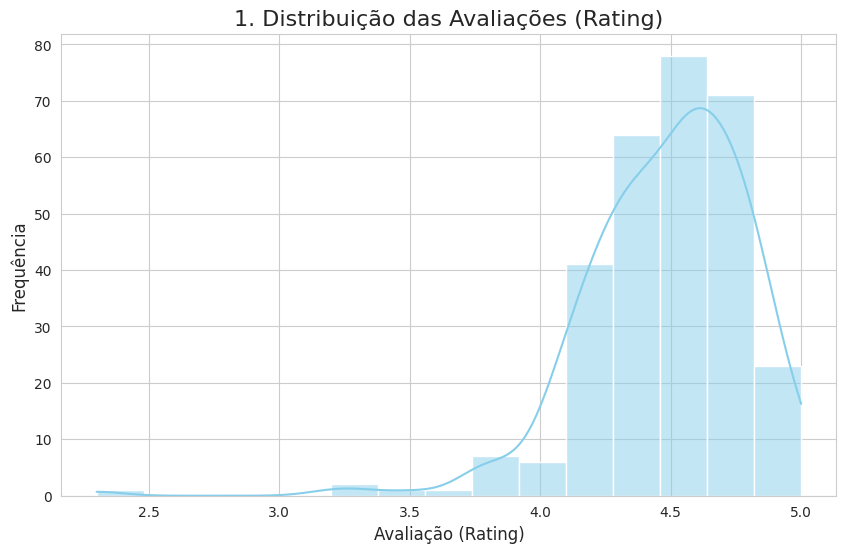

In [14]:
# 1. Gráfico de Histograma
fig, ax = plt.subplots()
sns.histplot(df['Rating'], kde=True, bins=15, ax=ax, color='skyblue')
ax.set_title('1. Distribuição das Avaliações (Rating)', fontsize=16)
ax.set_xlabel('Avaliação (Rating)', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
plt.show()

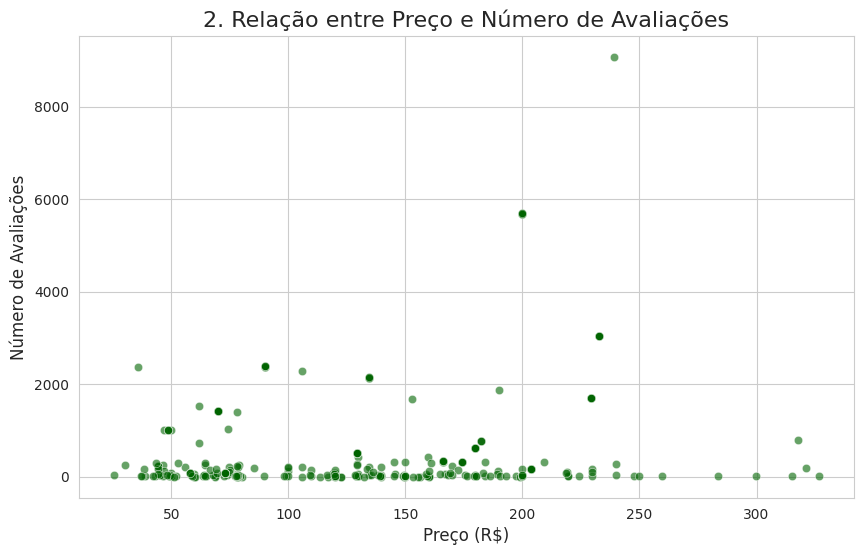

In [15]:
# 2. Gráfico de Dispersão
fig, ax = plt.subplots()
sns.scatterplot(x='Preco', y='Num_Avaliacoes', data=df, ax=ax, alpha=0.6, color='darkgreen')
ax.set_title('2. Relação entre Preço e Número de Avaliações', fontsize=16)
ax.set_xlabel('Preço (R$)', fontsize=12)
ax.set_ylabel('Número de Avaliações', fontsize=12)
plt.show()

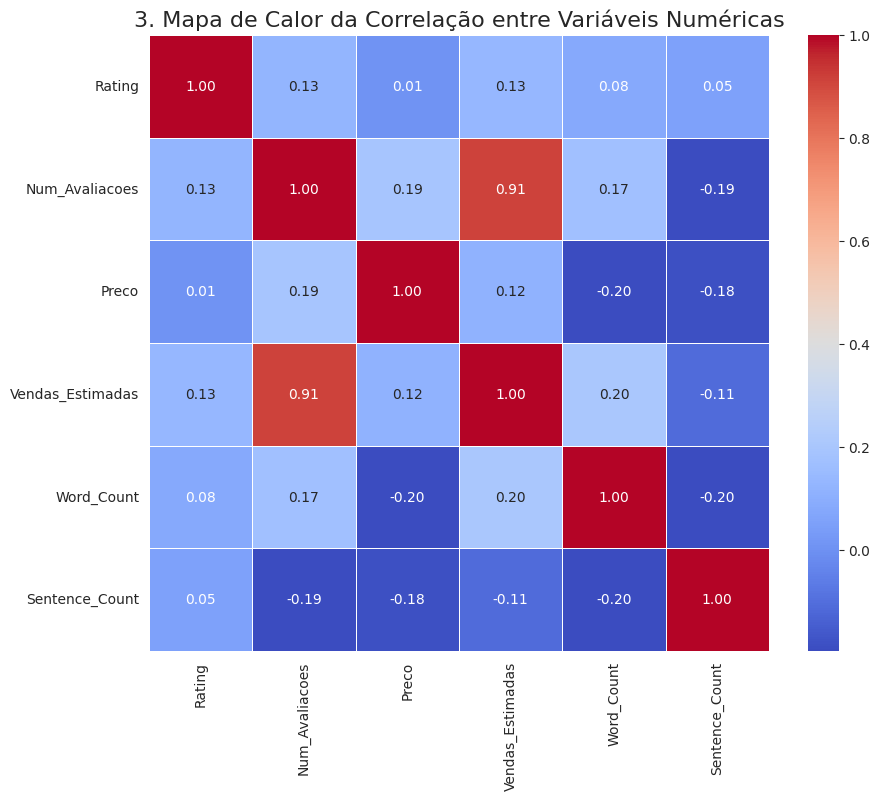

In [16]:
# 3. Mapa de Calor
numeric_cols_corr = ['Rating', 'Num_Avaliacoes', 'Preco', 'Vendas_Estimadas', 'Word_Count', 'Sentence_Count']
corr_matrix = df[numeric_cols_corr].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
ax.set_title('3. Mapa de Calor da Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

/tmp/ipykernel_11935/1759231444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_genero.index, y=vendas_por_genero.values, ax=ax, palette='viridis')


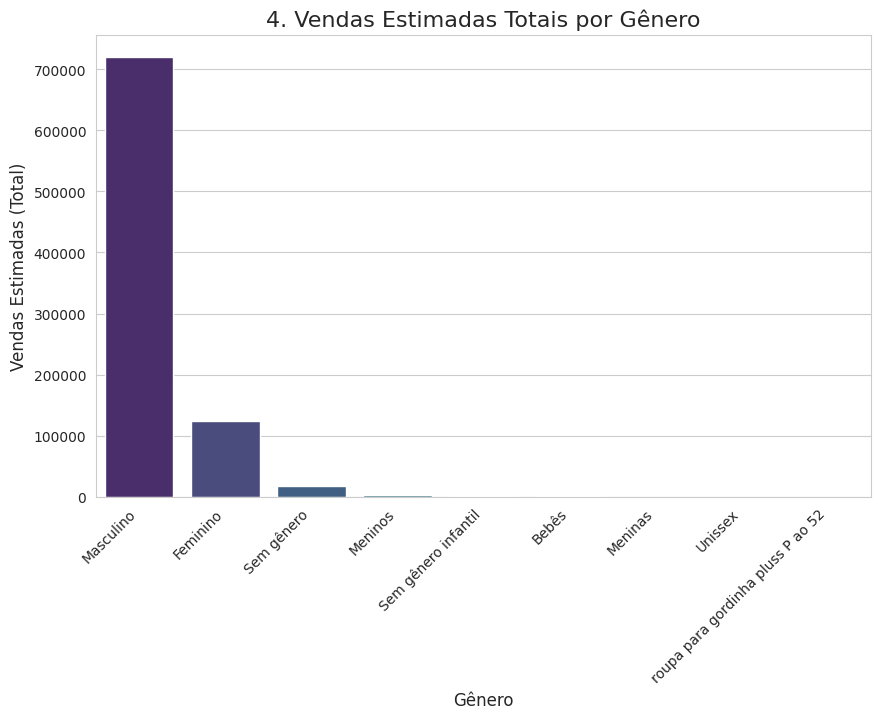

In [17]:
# 4. Gráfico de Barra
vendas_por_genero = df.groupby('Genero')['Vendas_Estimadas'].sum().sort_values(ascending=False)

fig, ax = plt.subplots()
sns.barplot(x=vendas_por_genero.index, y=vendas_por_genero.values, ax=ax, palette='viridis')
ax.set_title('4. Vendas Estimadas Totais por Gênero', fontsize=16)
ax.set_xlabel('Gênero', fontsize=12)
ax.set_ylabel('Vendas Estimadas (Total)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

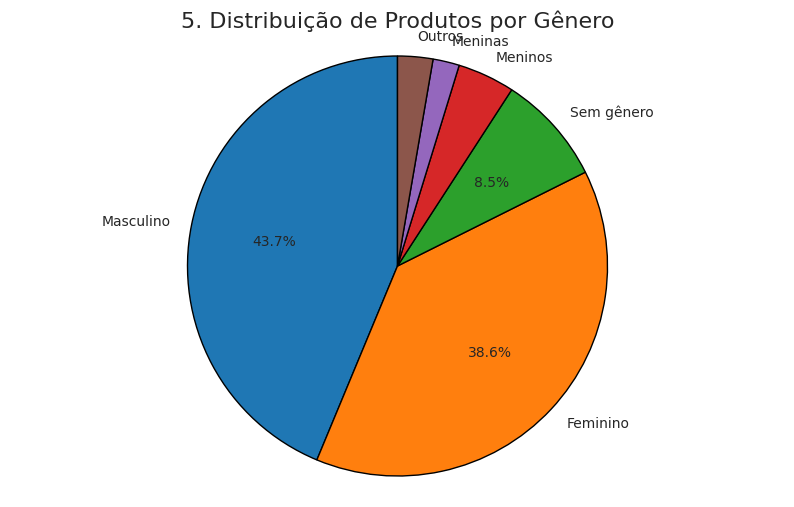

In [21]:
# 5. Gráfico de Pizza
def format_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''

contagem_genero = df['Genero'].value_counts()

top_n = 5
if len(contagem_genero) > top_n:
    outros = contagem_genero.iloc[top_n:].sum()
    contagem_genero = contagem_genero.iloc[:top_n]
    contagem_genero['Outros'] = outros

fig, ax = plt.subplots()
ax.pie(
    contagem_genero,
    labels=contagem_genero.index,
    autopct=format_autopct,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
ax.set_title('5. Distribuição de Produtos por Gênero', fontsize=16)
ax.axis('equal')
plt.show()


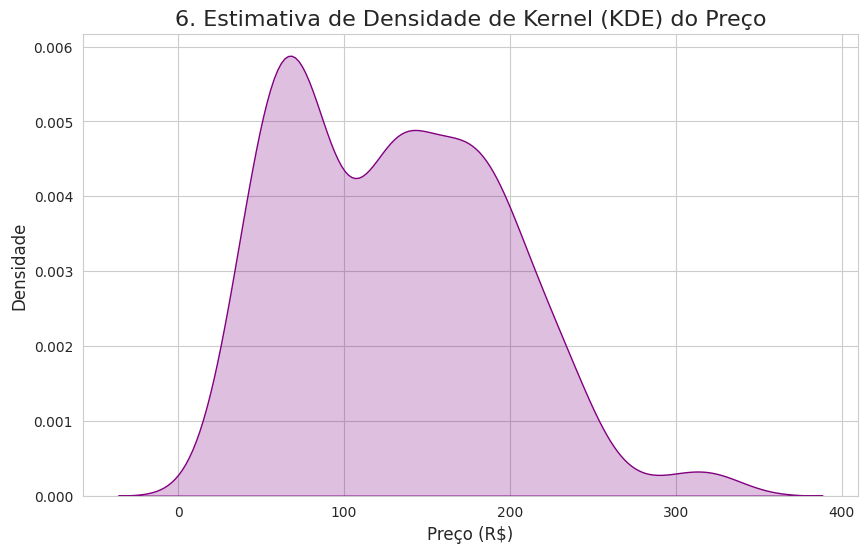

In [ ]:
#  6. Gráfico de Densidade

fig, ax = plt.subplots()
sns.kdeplot(df['Preco'], fill=True, ax=ax, color='purple')
ax.set_title('6. Estimativa de Densidade de Kernel (KDE) do Preço', fontsize=16)
ax.set_xlabel('Preço (R$)', fontsize=12)
ax.set_ylabel('Densidade', fontsize=12)
plt.show()


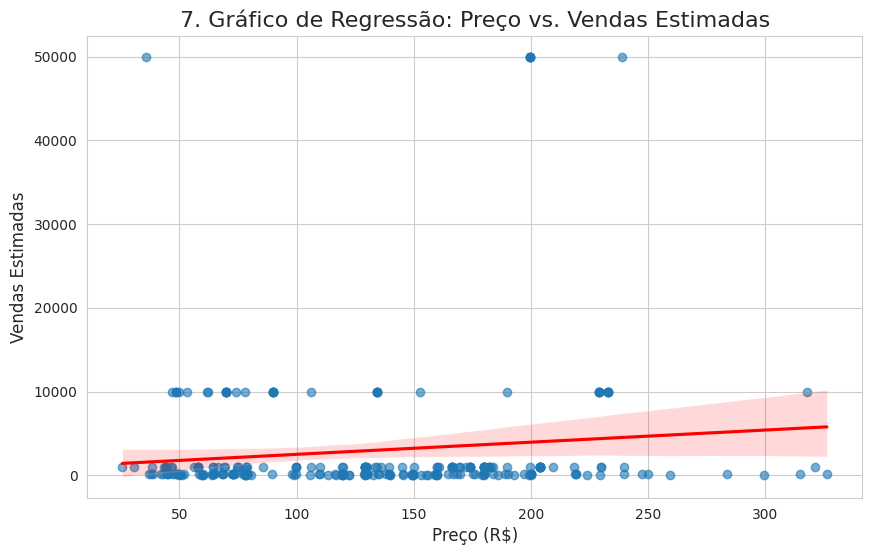

In [23]:
#  7. Grafico de Regressão

fig, ax = plt.subplots()
sns.regplot(x='Preco', y='Vendas_Estimadas', data=df, ax=ax, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
ax.set_title('7. Gráfico de Regressão: Preço vs. Vendas Estimadas', fontsize=16)
ax.set_xlabel('Preço (R$)', fontsize=12)
ax.set_ylabel('Vendas Estimadas', fontsize=12)
plt.show()
